# Pandas2(ДжВандерПлас)

# Работа с временными рядами¶

Библиотека Pandas была разработана в расчете на построение финансовых моделей, так что, как вы могли и ожидать, она содержит весьма широкий набор инструментов для работы с датой, временем и индексированными по времени данными. 

Данные о дате и времени могут находиться в нескольких видах, которые мы сейчас обсудим.

Метки даты/времени ссылаются на конкретные моменты времени (например, 4 июля 2015 года в 07:00 утра).

 Временные интервалы и периоды ссылаются на отрезки времени между конкретными начальной и конечной точками (например, 2015 год). 
Периоды обычно представляют собой особый случай интервалов, с непересекающимися интервалами одинаковой длительности (например, 24-часовые периоды времени,
составляющие сутки).

 Временная дельта (она же продолжительность) относится к отрезку времени конкретной длительности (например, 22,56 с).

В данном разделе мы расскажем, как работать с каждым из этих типов временных данных в библиотеке Pandas. 

Короткий раздел никоим образом не претендует на
звание исчерпывающего руководства по имеющимся в Python или библиотеке Pandas инструментам работы с временными рядами. 

Он представляет собой обзор работы с временными рядами в общих чертах. 

Мы начнем с краткого обсуждения инструментов для работы с датой и временем в языке Python, прежде чем перейти
непосредственно к обсуждению инструментов библиотеки Pandas. 

После перечисления источников углубленной информации мы рассмотрим несколько кратких примеров работы с данными временных рядов в библиотеке Pandas.

# Дата и время в языке Python

В мире языка Python существует немало представлений дат, времени, временных дельт и интервалов времени. 

Хотя для приложений науки о данных наиболее удобны инструменты работы с временными рядами библиотеки Pandas, не помешает посмотреть на другие используемые в Python пакеты.

## Нативные даты и время языка Python: пакеты datetime и dateutil

Базовые объекты Python для работы с датами и временем располагаются во встроенном пакете datetime. 

Его, вместе со сторонним модулем dateutil, можно использовать для быстрого выполнения множества удобных операций над датами и временем. 

Например, можно вручную сформировать дату с помощью типа datetime:


In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

Или, воспользовавшись модулем dateutil, можно выполнять синтаксический разбор дат, находящихся во множестве строковых форматов:

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
date = parser.parse("4 of July 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
date = parser.parse("4.07.15")
date

datetime.datetime(2015, 4, 7, 0, 0)

In [5]:
parser.parse("2012.10.02")

datetime.datetime(2012, 10, 2, 0, 0)

In [6]:
parser.parse("4.1.2012").day

1

In [7]:
parser.parse("4.1.2012").month

4

При наличии объекта datetime можно делать вывод дня недели:

In [8]:
date.strftime('%A')

'Tuesday'

В этой команде мы использовали для вывода даты один из стандартных кодов форматирования строк ("%A"), о котором можно прочитать в разделе strftime (https://
docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) документации по пакету datetime (https://docs.python.org/3/library/datetime.html) языка Python. 

Документацию по другим полезным утилитам для работы с датой и временем можно найти в онлайн-документации пакета dateutil (http://labix.org/python-dateutil). 

Не помешает также быть в курсе связанного с ними пакета pytz (http://pytz.sourceforge.net), содержащего инструменты для работы с частью данных временных рядов — часовыми поясами.

Сила пакетов datetime и dateutil заключается в их гибкости и удобном синтаксисе: эти объекты и их встроенные методы можно использовать для выполнения
практически любой интересующей вас операции. 

Единственное, в чем они работают плохо, это работа с большими массивами дат и времени: подобно спискам числовых переменных языка Python, работающим неоптимально по сравнению с типизированными числовыми массивами в стиле библиотеки NumPy, списки объектов даты/ времени Python работают с меньшей производительностью, чем типизированные массивы кодированных дат.

### Типизированные массивы значений времени: тип datetime64 библиотеки NumPy

Указанная слабая сторона формата даты/времени языка Python побудила команду разработчиков библиотеки NumPy добавить набор нативных типов данных временных рядов. 

Тип (dtype) datetime64 кодирует даты как 64-битные целые числа, так что представление массивов дат оказывается очень компактным. 

Для типа datetime64 требуется очень точно заданный формат входных данных:


In [9]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Но как только дата отформатирована, можно быстро выполнять над ней различные векторизованные операции:

In [10]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Поскольку datetime64-массивы библиотеки NumPy содержат данные одного типа, подобные операции выполняются намного быстрее, чем если работать непосредственно с объектами datetime языка Python, особенно если речь идет о больших массивах (мы рассматривали эту разновидность векторизации в разделе «Выполнение вычислений над массивами библиотеки NumPy: универсальные функции» главы 2).

Важный нюанс относительно объектов datetime64 и timedelta64: они основаны на базовой единице времени (fundamental time unit). 

Поскольку объект datetime64 ограничен точностью 64 бита, кодируемый им диапазон времени составляет эту
базовую единицу, умноженную на 2^64. 

Другими словами, datetime64 навязывает компромисс между разрешающей способностью по времени и максимальным промежутком времени.

Например, если нам требуется разрешающая способность 1 наносекунда, то у нас будет информация, достаточная для кодирования только интервала 264 наносекунды, или чуть более 600 лет. 

Библиотека NumPy определяет требуемую единицу на основе входной информации; например, вот дата/время на основе единицы в один день:

In [12]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

Вот дата/время на основе единицы в одну минуту:

In [15]:
np.datetime64('2015-07-04T12:00')

numpy.datetime64('2015-07-04T12:00')

Обратите внимание, что часовой пояс автоматически задается в соответствии с местным временем выполняющего код компьютера. 

Можно обеспечить принудительное использование любой требуемой базовой единицы с помощью одного из множества кодов форматирования; например, вот дата/время на основе единицы в одну наносекунду:

In [17]:
np.datetime64('2015-07-04T12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

В табл. 3.6, взятой из документации по типу datetime64 библиотеки NumPy, перечислены доступные для использования коды форматирования, а также относительные и абсолютные промежутки времени, которые можно кодировать с их помощью.

###### Описание кодов форматирования даты и времени

Код Значение Промеж времени(относ) Промеж времени (абс)

Y   Год      ±9.2e18 лет           [9.2e18 до н. э., 9.2e18 н. э.]

M   Месяц    ±7.6e17 лет           [7.6e17 до н. э., 7.6e17 н. э.]

W   Неделя   ±1.7e17 лет           [1.7e17 до н. э., 1.7e17 н. э.]

D   День     ±2.5e16 лет           [2.5e16 до н. э., 2.5e16 н. э.]

h   Час      ±1.0e15 лет           [1.0e15 до н. э., 1.0e15 н. э.]

m   Минута   ±1.7e13 лет           [1.7e13 до н. э., 1.7e13 н. э.]

s   Секунда  ±2.9e12 лет           [2.9e9 до н. э., 2.9e9 н. э.]

ms  Миллисек ±2.9e9 лет            [2.9e6 до н. э., 2.9e6 н. э.]

us  Микросек ±2.9e6 лет            [290301 до н. э., 294241 н. э.]

ns  Наносек  ±292 лет              [1678 до н. э., 2262 н. э.]

ps  Пикосек  ±106 дней             [1969 до н. э., 1970 н. э.]

fs  Фемтосек ±2.6 часов            [1969 до н. э., 1970 н. э.]

as  Аттосек  ±9.2 секунды          [1969 до н. э., 1970 н. э.]

Удобное значение по умолчанию для типов данных, встречающихся в реальном мире, — datetime64[ns], позволяющее кодировать достаточный диапазон современных дат с высокой точностью.

Наконец, отметим, что, хотя тип данных datetime64 лишен некоторых недостатков встроенного типа данных datetime языка Python, ему недостает многих предоставляемых datetime и особенно dateutil удобных методов и функций. 

Больше информации можно найти в документации по типу datetime64 библиотеки NumPy

(http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html).

## Даты и время в библиотеке Pandas: избранное из лучшего

Библиотека Pandas предоставляет, основываясь на всех только что обсуждавшихся инструментах, объект Timestamp, сочетающий удобство использования datetime и dateutil с эффективным хранением и векторизованным интерфейсом типа numpy.datetime64. 

Библиотека Pandas умеет создавать из нескольких таких объектов Timestamp объект класса DatetimeIndex, который можно использовать для индексации данных в объектах Series или DataFrame. 

Можно применить инструменты библиотеки Pandas для воспроизведения вышеприведенной наглядной демонстрации.

Можно выполнить синтаксический разбор строки с датой в гибком формате и воспользоваться кодами форматирования,
чтобы вывести день недели:

In [18]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [19]:
date.strftime('%A')


'Saturday'

Кроме этого, можно выполнять векторизованные операции в стиле библиотеки NumPy непосредственно над этим же объектом:

In [20]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

В следующем разделе мы подробнее рассмотрим манипуляции над данными временных рядов с помощью предоставляемых библиотекой Pandas инструментов.

### Временные ряды библиотеки Pandas: индексация по времени

Инструменты для работы с временными рядами библиотеки Pandas особенно удобны при необходимости индексации данных по меткам даты/времени. 

Например, создадим объект Series с индексированными по времени данными:

In [21]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Теперь, когда эти данные находятся в объекте Series, можно использовать для них любые из обсуждавшихся в предыдущих разделах паттернов индексации Series,
передавая значения, которые допускают приведение к типу даты:

In [22]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

Имеются также дополнительные специальные операции индексации, предназначенные только для дат. 

Например, можно указать год, чтобы получить срез всех
данных за этот год:

In [23]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

Позднее мы рассмотрим еще примеры удобства индексации по датам. 

Но сначала изучим имеющиеся структуры данных для временных рядов.

# Структуры данных для временных рядов библиотеки Pandas

В этом разделе мы рассмотрим основные структуры данных, предназначенные для работы с временными рядами.

Для меток даты/времени библиотека Pandas предоставляет тип данных Timestamp.

Этот тип является заменой для нативного типа данных datetime языка Python, он основан на более эффективном типе данных numpy.datetime64. 

Соответствующая индексная конструкция — DatetimeIndex.

 Для периодов времени библиотека Pandas предоставляет тип данных Period.

Этот тип на основе типа данных numpy.datetime64 кодирует интервал времени фиксированной периодичности. Соответствующая индексная конструкция — PeriodIndex.

 Для временных дельт (продолжительностей) библиотека Pandas предоставляет тип данных Timedelta. Timedelta — основанная на типе numpy.timedelta64 более эффективная замена нативного типа данных datetime.timedelta языка Python.

Соответствующая индексная конструкция — TimedeltaIndex.

Самые базовые из этих объектов даты/времени — объекты Timestamp и DatetimeIndex. 

Хотя к ним и можно обращаться непосредственно, чаще используют функцию pd.to_datetime(), умеющую выполнять синтаксический разбор широкого диапазона форматов. 

При передаче в функцию pd.to_datetime() отдельной даты она возвращает Timestamp, при передаче ряда дат по умолчанию возвращает DatetimeIndex:

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime

In [8]:
dates1 = pd.to_datetime(datetime(2015, 7, 3))
dates1

Timestamp('2015-07-03 00:00:00')

In [6]:
dates = pd.to_datetime([datetime(2015, 7, 3), 
                        '4th of July, 2015',
                        '2015-Jul-6', 
                        '07-07-2015', 
                        '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Любой объект DatetimeIndex можно с помощью функции to_period() преобразовать в объект PeriodIndex, указав код для периодичности интервала. 

В данном случае мы использовали код 'D', означающий, что периодичность интервала — один день:

In [9]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

Объект TimedeltaIndex создается, например, при вычитании одной даты из другой:

In [10]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

###### Регулярные последовательности: функция pd.date_range()

Чтобы облегчить создание регулярных последовательностей, библиотека Pandas предоставляет
несколько функций: 
pd.date_range() — для меток даты/времени, pd.period_range() — для периодов времени pd.timedelta_range() — для временных дельт.

Мы уже видели, что функции range() языка Python и np.arange() библиотеки NumPy преобразуют начальную точку, конечную точку и (необязательную) величину шага в последовательность. 

Аналогично функция pd.date_range() создает регулярную последовательность дат, принимая на входе начальную дату, конечную дату и необязательный код периодичности. 

По умолчанию период равен одному дню:

In [11]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

В качестве альтернативы можно также задать диапазон дат с помощью не начальной и конечной точек, а посредством начальной точки и количества периодов
времени:

In [12]:
pd.date_range('2015-07-03', periods=8)


DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Можно изменить интервал времени, поменяв аргумент freq, имеющий по умолчанию значение 'D'. Например, в следующем фрагменте мы создаем диапазон часовых меток даты/времени:

In [13]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

Для создания регулярных последовательностей значений периодов или временных дельт можно воспользоваться функциями pd.period_range() и pd.timedelta_ range(), напоминающими функцию date_range(). 

Вот несколько периодов времени длительностью в месяц:

In [14]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

Вот последовательность продолжительностей, увеличивающихся на час:

In [15]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

Все эти операции требуют понимания кодов периодичности, приведенных в следующем разделе.

### Периодичность и смещения дат

Периодичность или смещение даты — базовое понятие для инструментов библиотеки Pandas, необходимых для работы с временными рядами. 

Аналогично уже продемонстрированным кодам D (день) и H (час) можно использовать коды для задания любой требуемой периодичности. 

В табл. 3.7 описаны основные существующие коды.

###### Список кодов периодичности библиотеки Pandas

Код              Описание 

D                Календарный день 

B                Рабочий день

W                Неделя

M                Конец месяца 

BM               Конец отчетного месяца

Q                Конец квартала 

BQ               Конец отчетного квартала

A                Конец года 

BA               Конец финансового года

H                Час 

BH               Рабочие часы

T                Минута

S                Секунда

L                Миллисекунда

U                Микросекунда

N                Наносекунда

Периодичность в месяц, квартал и год определяется на конец соответствующего периода. 

Добавление к любому из кодов суффикса S приводит к определению начала периода (табл. 3.8).

###### Список стартовых кодов периодичности

Код            Описание

MS             Начало месяца

BMS            Начало отчетного месяца

QS             Начало квартала

BQS            Начало отчетного квартала

AS             Начало года

BAS            Начало финансового года

Кроме этого, можно изменить используемый для определения квартала или года месяц с помощью добавления в конец кода месяца, состоящего из трех букв:


 Q-JAN, BQ-FEB, QS-MAR, BQS-APR и т. д.
 A-JAN, BA-FEB, AS-MAR, BAS-APR и т. д.

Аналогичным образом можно изменить точку разбиения для недельной периодичности, добавив состоящий из трех букв код дня недели:

W-SUN, W-MON, W-TUE, W-WED и т. д.

Для указания иной периодичности можно сочетать коды с числами. 

Например, для периодичности 2 часа 30 минут можно скомбинировать коды для часа (H) и минуты (T):

In [16]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

Все эти короткие коды ссылаются на соответствующие экземпляры смещений даты/времени временных рядов библиотеки Pandas, которые можно найти в модуле pd.tseries.offsets. 

Например, можно непосредственно создать смещение
в один рабочий день следующим образом:

In [ ]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

Дальнейшее обсуждение периодичности и смещений времени можно найти
в разделе «Объекты DateOffset» (http://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects) онлайн-документации библиотеки Pandas

### Передискретизация, временные сдвиги и окна

Возможность использовать дату/время в качестве индексов для интуитивно понятной организации данных и доступа к ним — немаловажная часть инструментария библиотеки Pandas по работе с временными рядами. 

При этом сохраняются общие преимущества использования индексированных данных (автоматическое выравнивание во время операций, интуитивно понятные срезы и доступ к данным и т. д.), но библиотека Pandas предоставляет еще несколько дополнительных операций специально для временных рядов.


Мы рассмотрим некоторые из них, воспользовавшись в качестве примера данными по курсам акций. 

Библиотека Pandas, будучи разработанной в значительной
степени для работы с финансовыми данными, имеет для этой цели несколько весьма специфических инструментов. 

Например, сопутствующий Pandas пакет pandas-datareader (который можно установить с помощью команды conda install pandas-datareader) умеет импортировать финансовые данные из множества источников, включая Yahoo! Finance, Google Finance и другие.

В следующем примере мы импортируем историю цен акций для Google:

from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()


In [ ]:
Для простоты будем использовать только окончательную цену:

In [3]:
goog = goog['Close']


Визуализировать это можно с помощью метода plot() после обычных команд настройки Matplotlib 

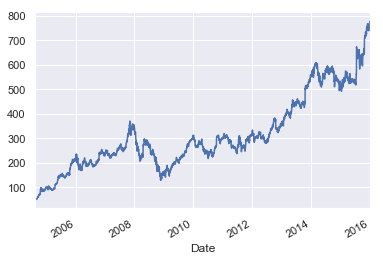

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
goog.plot();


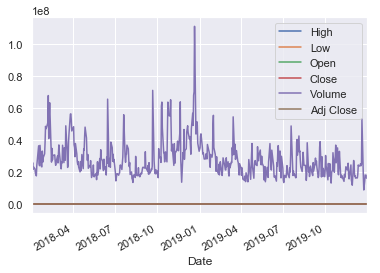

In [7]:
msft = data.DataReader('MSFT', start='2018', end='2020', data_source='yahoo')
msft.plot();

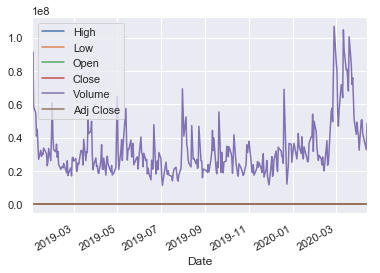

In [10]:
aapl = data.DataReader('AAPL', start='2019', end='2021', data_source='yahoo')
aapl.plot();

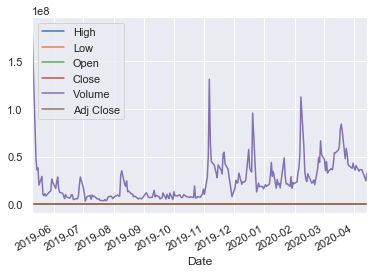

In [11]:
uber = data.DataReader('UBER', start='2019', end='2021', data_source='yahoo')
uber.plot();

### Передискретизация и изменение периодичности интервалов

При работе с данными временных рядов часто бывает необходимо переразбить их с использованием интервалов другой периодичности. 

Сделать это можно с помощью метода resample() или гораздо более простого метода asfreq(). 

Основная разница между ними заключается в том, что resample() выполняет агрегирование данных, а asfreq() — выборку данных.

Рассмотрим, что возвращают эти два метода для данных по ценам закрытия Google при понижающей дискретизации данных.

Здесь мы выполняем передискретизацию
данных на конец финансового года (рис. 3.6).

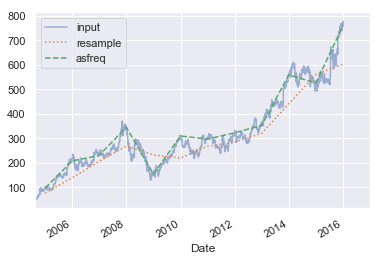

In [12]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

Обратите внимание на различие: в каждой точке resample выдает среднее значение за предыдущий год, а asfreq — значение на конец года.

В случае повышающей дискретизации методы resample() и asfreq() в значительной степени идентичны, хотя доступных для использования параметров у resample()
гораздо больше. 

В данном случае оба этих метода по умолчанию оставляют значения интерполированных точек пустыми, то есть заполненными значениями NA.

Аналогично обсуждавшейся выше функции pd.fillna() метод asfreq() принимает аргумент method, определяющий, откуда будут браться значения для таких точек.

Здесь мы передискретизируем данные по рабочим дням с периодичностью обычного дня, то есть включая выходные дни (рис. 3.7):

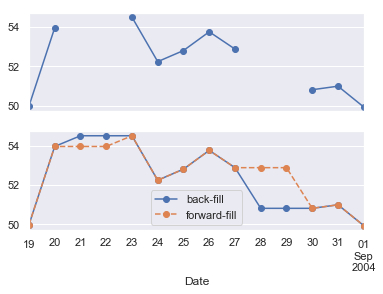

In [13]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

Верхний график представляет поведение по умолчанию: в выходные дни значения равны NA и отсутствуют на графике. 

Нижний график демонстрирует различия между двумя методиками заполнения пропусков: интерполяцией вперед (forwardfill interpolation) и интерполяцией назад (back-fill interpolation).

# Временные сдвиги

Еще одна распространенная операция с временными рядами — сдвиг данных во времени. 

В библиотеке Pandas есть два родственных метода для подобных вычислений: shift() и tshift(). 

Разница между ними заключается в том, что shift()
выполняет сдвиг данных, а tshift() — сдвиг индекса. 

В обоих случаях сдвиг задается кратным периоду.

В следующем фрагменте кода мы сдвигаем как данные, так и индекс на 900 дней. 

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pandas as pd
import numpy as np

In [10]:
from pandas_datareader import data

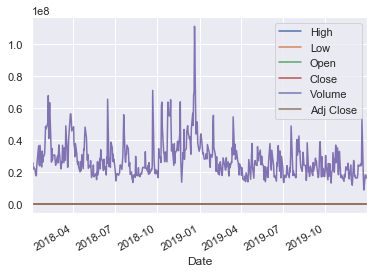

In [11]:
msft = data.DataReader('MSFT', start='2018', end='2020', data_source='yahoo')
msft.plot();

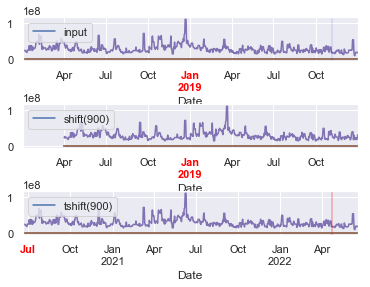

In [34]:
fig, ax = plt.subplots(3, sharey=True)
# задаем периодичность данных
msft = msft.asfreq('D', method='pad')
msft.plot(ax=ax[0])
msft.shift(90).plot(ax=ax[1])
msft.tshift(900).plot(ax=ax[2])
plt.subplots_adjust(hspace=1, wspace=0)
# Легенды и пояснения
local_max = pd.to_datetime('2019-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.1, color='blue')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

Видим, что shift(900) сдвигает данные на 900 дней, перемещая часть из них за пределы графика (и оставляя NA-значения с другой стороны), в то время как
tshift(900) сдвигает на 900 дней значения индекса.

Такую разновидность сдвигов часто используют для вычисления изменений с течением времени. 

Например, мы воспользовались сдвинутыми значениями, чтобы вычислить прибыль за год от вложений в акции  по всему набору данных 

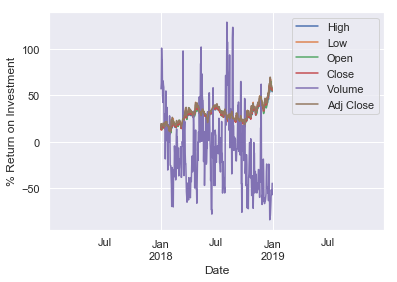

In [15]:
ROI = 100 * (msft.tshift(-365) / msft - 1)
ROI.plot()
plt.ylabel('% Return on Investment'); # Прибыль от вложений


Это помогает увидеть общие тренды акций : до сих пор наиболее благоприятным для инвестиций в акции  был (что неудивительно) момент вскоре после первоначального их размещения на рынке, а также в середине экономической
рецессии 2009 года.

# Скользящие окна

Скользящие статистические показатели — третья из реализованных в библиотеке Pandas разновидностей операций, предназначенных для временных рядов. 

Работать с ними можно с помощью атрибута rolling() объектов Series и DataFrame, возвращающего представление, подобное тому, с которым мы сталкивались при выполнении операции groupby (см. раздел «Агрегирование и группировка» данной
главы). 

Это скользящее представление предоставляет по умолчанию несколько операций агрегирования.

Например, вот одногодичное скользящее среднее значение и стандартное отклонение цен на акции.

Rolling [window=365,center=True,axis=0]


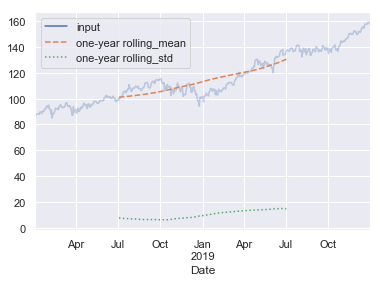

In [41]:
#print('msft', msft)
msft_close = msft['Close']
rolling = msft_close.rolling(365, center=True)
print(rolling)
data = pd.DataFrame({'input': msft_close,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

# Где найти дополнительную информацию

В данном разделе приведена лишь краткая сводка некоторых наиболее важных возможностей инструментов для работы с временными рядами библиотеки Pandas.

Более развернутое обсуждение этой темы можно найти в разделе Time Series/Date
(«Временные ряды/даты») онлайн-документации библиотеки Pandas (http://pandas.pydata.org/pandas-docs/stable/timeseries.html).

Еще один великолепный источник информации — руководство Python for Data
Analysis издательства O’Reilly (http://shop.oreilly.com/product/0636920023784.do). 

Хотя ему уже несколько лет, это бесценный источник информации по использованию
библиотеки Pandas. 

В частности, в книге сделан особый акцент на применении
инструментов временных рядов в контексте бизнеса и финансов и уделено больше внимания конкретным деталям бизнес-календаря, работе с часовыми поясами
и связанным с этим вопросам.

Вы также можете воспользоваться справочной функциональностью оболочки IPython для изучения и экспериментов с другими параметрами, имеющимися
у обсуждавшихся здесь функций и методов. 

Я считаю, что это оптимальный способ
изучения какого-либо нового инструмента языка Python.

# Пример: визуализация количества велосипедов в Сиэтле

В качестве более сложного примера работы с данными временных рядов рассмотрим подсчет количества велосипедов на Фримонтском мосту в Сиэтле. 

Эти данные поступают из автоматического счетчика велосипедов, установленного в конце 2012 года с индуктивными датчиками на восточной и западной боковых
дорожках моста. 

Сведения о почасовом количестве велосипедов можно скачать
по адресу http://data.seattle.gov/; вот прямая ссылка на набор данных: https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k.

По состоянию на лето 2016 года CSV-файл можно скачать следующим образом:

In [2]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 1614k    0 1614k    0     0   749k      0 --:--:--  0:00:02 --:--:--  749k
100 2046k    0 2046k    0     0   873k      0 --:--:--  0:00:02 --:--:--  873k


После скачивания набора данных можно воспользоваться библиотекой Pandas для чтения CSV-файла в объект DataFrame.

Можно указать, что в качестве индекса мы хотим видеть объекты Date и чтобы выполнялся автоматический синтаксический разбор этих дат:

In [4]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


Для удобства мы подвергнем этот набор данных дальнейшей обработке, сократив названия столбцов и добавив столбец Total («Итого»):

In [12]:
data.shape

(65688, 3)

In [14]:
data.columns = ['Total', 'West', 'East']

In [15]:
data['Total'] = data.eval('West + East')

In [17]:
data.head()

,Total,West,East
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


Теперь рассмотрим сводные статистические показатели для этих данных:

In [18]:
data.dropna().describe()

,Total,West,East
count,65678.000000,65678.000000,65678.000000
mean,113.397378,51.748302,61.649076
std,144.853108,66.803517,90.358214
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


### Визуализация данных

Мы можем почерпнуть полезную информацию из этого набора данных, визуализировав его. 

Начнем с построения графика исходных данных 

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

Text(0, 0.5, 'Hourly Bicycle Count')

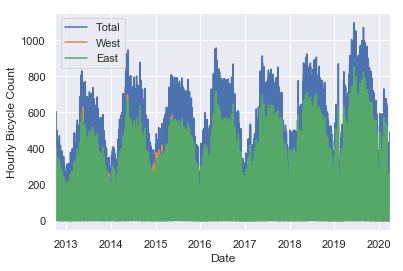

In [25]:
data.plot()
plt.ylabel('Hourly Bicycle Count')
# Количество велосипедов по часам

Примерно 25 000 почасовых выборок — слишком плотная дискретизация, чтобы можно было понять хоть что-то. 

Можно почерпнуть больше информации, если
выполнить передискретизацию этих данных на сетке с более крупным шагом. 

Выполним передискретизацию с шагом одна неделя

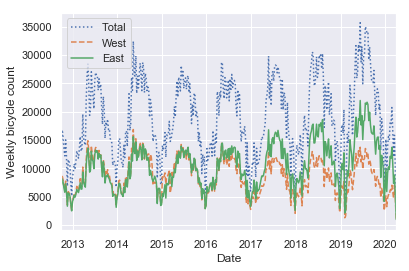

In [26]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count'); # Количество велосипедов еженедельно

Количество велосипедов, пересекающих Фримонтский мост в Сиэтле, с шагом одна неделя

Это демонстрирует нам некоторые интересные сезонные тренды: как и следовало ожидать, летом люди ездят на велосипедах больше, чем зимой, и даже в пределах каждого из сезонов велосипеды используются с разной интенсивностью в разные недели (вероятно, в зависимости от погоды; см. раздел «Заглянем глубже: линейная регрессия» главы 5, в котором будем рассматривать этот вопрос).

Еще один удобный способ агрегирования данных — вычисление скользящего среднего с помощью функции pd.rolling_mean().

Здесь мы вычисляем для наших данных скользящее среднее за 30 дней, центрируя при этом окно 

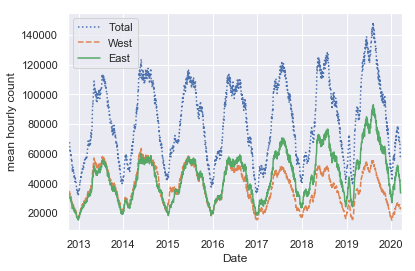

In [27]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count'); # Среднее количество по часам

Причина зубчатости получившего изображения — в резкой границе окна. 

Более гладкую версию скользящего среднего можно получить, воспользовавшись оконной функцией, например Гауссовым окном. 

Следующий код (визуализированный на рис. 3.14) задает как ширину окна (в нашем случае 50 дней), так и ширину Гауссовой функции внутри окна (в нашем случае 10 дней):

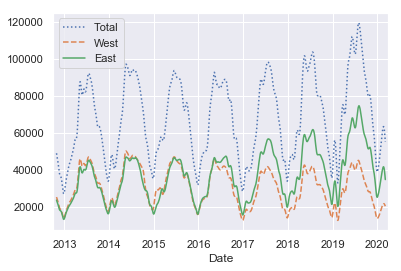

In [29]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

Сглаженная Гауссова функция еженедельного количества велосипедов

### Углубляемся в изучение данных

Хотя с помощью сглаженных представлений данных на рис. 3.14 можно получить общее представление о трендах данных, они скрывают от нас многие интересные
нюансы их структуры. 

Например, нам может понадобиться увидеть усредненное
движение велосипедного транспорта как функцию от времени суток. 

Это можно сделать с помощью функциональности GroupBy, обсуждавшейся в разделе «Агрегирование и группировка» данной главы

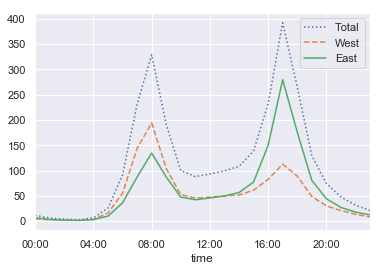

In [33]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(
    xticks=hourly_ticks, 
    style=[':', '--', '-']);

In [31]:
hourly_ticks

array([    0, 14400, 28800, 43200, 57600, 72000])

 Среднее почасовое количество велосипедов


Почасовое движение транспорта представляет собой строго бимодальное распределение с максимумами в 08:00 утра и 05:00 вечера. 

Вероятно, это свидетельствует о существенном вкладе маятниковой миграции через мост. 

В пользу этого говорят и различия между значениями с западной боковой дорожки (обычно используемой при движении в деловой центр Сиэтла) с более выраженными утренними максимумами и значениями с восточной боковой дорожки (обычно используемой при движении из делового центра Сиэтла) с более выраженными вечерними максимумами

Нас могут также интересовать изменения ситуации по дням недели. 

Это можно выяснить с помощью операции groupby.

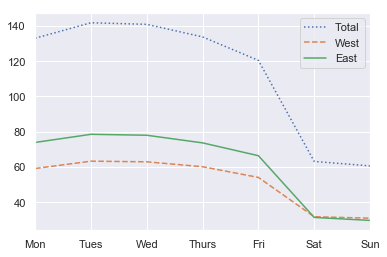

In [34]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

 Среднее количество велосипедов по дням

Этот график демонстрирует существенное различие между количеством велосипедов в будние и выходные дни: с понедельника по пятницу мост пересекает
в среднем вдвое больше велосипедистов, чем в субботу и воскресенье.

С учетом этого выполним сложную операцию groupby и посмотрим на почасовой тренд в будни по сравнению с выходными. 

Начнем с группировки как по признаку выходного дня, так и по времени суток:

In [35]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

Теперь воспользуемся некоторыми инструментами из раздела «Множественные суб графики» главы 4, чтобы нарисовать два графика бок о бок 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


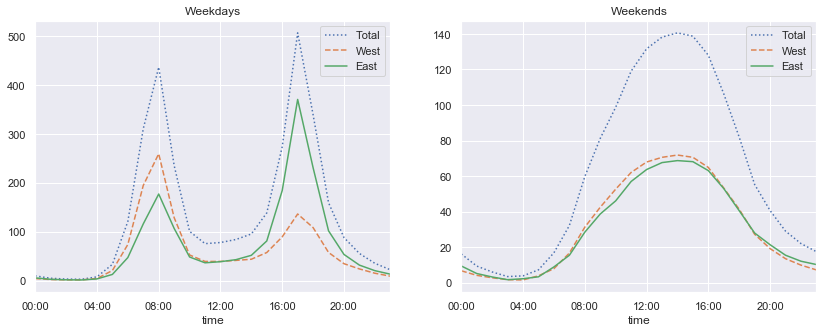

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-']);


Результат оказался очень интересным: мы видим бимодальный паттерн, связанный с поездками на работу в город на протяжении рабочей недели, и унимодальный паттерн, связанный с досугом/отдыхом во время выходных. 

Было бы интересно дальше покопаться в этих данных и изучить влияние погоды, температуры, времени года и других факторов на паттерны поездок в город на велосипедах. 

Дальнейшее обсуждение этих вопросов см. в сообщении «Действительно ли в Сиэтле наблюдается
оживление в сфере поездок на велосипедах?» (https://jakevdp.github.io/blog/2014/06/10/
is-seattle-really-seeing-an-uptick-in-cycling/) из моего блога, в котором используется подмножество этих данных. 

Мы также вернемся к этому набору данных в контексте
моделирования в разделе «Заглянем глубже: линейная регрессия» главы 5.

# Увеличение производительности библиотеки Pandas: eval() и query()

Основные возможности стека PyData основываются на умении библиотек NumPy и Pandas передавать простые операции на выполнение программам на языке C посредством интуитивно понятного синтаксиса: примерами могут послужить векторизованные/транслируемые операции в библиотеке NumPy, а также операции группировки в библиотеке Pandas. 

Хотя эти абстракции весьма производительны и эффективно работают для многих распространенных сценариев использования, они зачастую требуют создания временных вспомогательных объектов, что приводит к чрезмерным накладным расходам как процессорного времени, так
и оперативной памяти.

По состоянию на версию 0.13 (выпущенную в январе 2014 года) библиотека Pandas включает некоторые экспериментальные инструменты, позволяющие обращаться к работающим со скоростью написанных на языке C операциям без выделения существенных объемов памяти на промежуточные массивы. 

Эти утилиты — функции eval() и query(), основанные на пакете Numexpr (https://github.com/pydata/numexpr).


Мы рассмотрим их использование и приведем некоторые эмпирические правила, позволяющие решить, имеет ли смысл их применять.

# Основания для использования функций query() и eval(): составные выражения

Библиотеки NumPy и Pandas поддерживают выполнение быстрых векторизованных операций; например, при сложении элементов двух массивов:

In [41]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(int(1E6))
y = rng.rand(int(1E6))
#%timeit x + y 100 loops, best of 3: 3.39 ms per loop

In [48]:
%timeit x + y 

3.96 ms ± 342 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Как уже обсуждалось в разделе «Выполнение вычислений над массивами библиотеки NumPy: универсальные функции» главы 2, такая операция выполняется гораздо быстрее, чем сложение с помощью цикла или спискового включения языка Python:

In [49]:
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype=x.dtype, count=len(x))

413 ms ± 47.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Однако данная абстракция оказывается менее эффективной при вычислении составных выражений. 

Например, рассмотрим выражение:

In [50]:
mask = (x > 0.5) & (y < 0.5)

Поскольку библиотека NumPy вычисляет каждое подвыражение, оно эквивалентно
следующему:

In [51]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

Другими словами, для каждого промежуточного шага явным образом выделяется оперативная память. 

Если массивы x и y очень велики, это может привести
к значительным накладным расходам оперативной памяти и процессорного времени.

Библиотека Numexpr позволяет вычислять подобные составные выражения поэлементно, не требуя выделения памяти под промежуточные массивы целиком.

В документации библиотеки Numexpr (https://github.com/pydata/numexpr) приведено
больше подробностей, но пока достаточно будет сказать, что функции этой библиотеки принимают на входе строку, содержащую выражение в стиле библиотеки NumPy, которое требуется вычислить:

In [52]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

True

Преимущество заключается в том, что библиотека Numexpr вычисляет выражение, не используя полноразмерных временных массивов, а потому оказывается намного более эффективной, чем NumPy, особенно в случае больших массивов.

Инструменты query() и eval(), которые мы будем обсуждать, идеологически схожи и используют пакет Numexpr.

https://github.com/pydata/numexpr

### Использование функции pandas.eval() для эффективных операций

Функция eval() библиотеки Pandas применяет строковые выражения для эффективных вычислительных операций с объектами DataFrame. 

Например, рассмотрим следующие объекты DataFrame:

In [53]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) 
                      for i in range(4))

In [54]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891
1,0.031429,0.636410,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,0.076980,...,0.093103,0.897216,0.900418,0.633101,0.339030,0.349210,0.725956,0.897110,0.887086,0.779876
2,0.642032,0.084140,0.161629,0.898554,0.606429,0.009197,0.101472,0.663502,0.005062,0.160808,...,0.030500,0.037348,0.822601,0.360191,0.127061,0.522243,0.769994,0.215821,0.622890,0.085347
3,0.051682,0.531355,0.540635,0.637430,0.726091,0.975852,0.516300,0.322956,0.795186,0.270832,...,0.990505,0.412618,0.372018,0.776413,0.340804,0.930757,0.858413,0.428994,0.750871,0.754543
4,0.103124,0.902553,0.505252,0.826457,0.320050,0.895523,0.389202,0.010838,0.905382,0.091287,...,0.455657,0.620133,0.277381,0.188121,0.463698,0.353352,0.583656,0.077735,0.974395,0.986211


In [55]:
df4.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.773222,0.022870,0.135256,0.547153,0.112734,0.382484,0.282446,0.479390,0.973054,0.968159,...,0.742549,0.014689,0.638707,0.557382,0.935098,0.161364,0.792444,0.789514,0.522443,0.575358
1,0.608169,0.141071,0.560629,0.028672,0.017801,0.928250,0.939959,0.865063,0.125569,0.062302,...,0.563912,0.085168,0.545653,0.062591,0.079648,0.904816,0.570289,0.112442,0.187270,0.167751
2,0.790280,0.450114,0.316514,0.443655,0.961636,0.183530,0.092308,0.563372,0.137717,0.493172,...,0.943914,0.999072,0.656912,0.879790,0.801385,0.020247,0.274610,0.013139,0.884154,0.128746
3,0.062328,0.129402,0.951153,0.674908,0.706534,0.069130,0.331226,0.421508,0.578126,0.674810,...,0.026716,0.690321,0.373365,0.361318,0.044817,0.219551,0.684745,0.104272,0.996603,0.256260
4,0.139670,0.010372,0.683865,0.662876,0.593358,0.273290,0.001748,0.173523,0.578557,0.084194,...,0.472835,0.914288,0.634008,0.922544,0.063849,0.203463,0.805392,0.097480,0.733605,0.278122


Для вычисления суммы всех четырех объектов DataFrame при стандартном подходе библиотеки Pandas можно написать сумму:

In [56]:
%timeit df1 + df2 + df3 + df4

96.5 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Можно вычислить тот же результат с помощью функции pd.eval(), задав выражение в виде строки:

In [57]:
%timeit pd.eval('df1 + df2 + df3 + df4')

46.2 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Версия этого выражения с функцией eval() работает на 50% быстрее (и использует намного меньше памяти), возвращая тот же самый результат:

In [58]:
np.allclose(df1 + df2 + df3 + df4, pd.eval('df1 + df2 + df3 + df4'))

True

###### Поддерживаемые функцией pd.eval() операции. 

На момент выпуска версии 0.16 библиотеки Pandas функция pd.eval() поддерживает широкий спектр операций.

Для их демонстрации мы будем использовать следующие целочисленные объекты DataFrame:

In [59]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3))) 
                           for i in range(5))

Арифметические операторы. 

Функция pd.eval() поддерживает все арифметические операторы. Например:

In [60]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

Операторы сравнения. 

Функция pd.eval() поддерживает все операторы сравнения, включая выражения, организованные цепочкой:

In [61]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [ ]:
Побитовые операторы. 

Функция pd.eval() поддерживает побитовые операторы
& и |:

In [62]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

Кроме того, она допускает использование литералов and и or в булевых выражениях:

In [63]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

Атрибуты объектов и индексы. 

Функция pd.eval() поддерживает доступ к атрибутам объектов с помощью синтаксиса obj.attr и к индексам посредством синтаксиса obj[index]:

In [64]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

Другие операции. 

Другие операции, например вызовы функций, условные выражения, циклы и другие, более сложные конструкции, пока в функции pd.eval() не реализованы. 

При необходимости выполнения подобных сложных видов выражений можно воспользоваться самой библиотекой Numexpr.

### Использование метода DataFrame.eval() для выполнения операций по столбцам

У объектов DataFrame существует метод eval(), работающий схожим образом с высокоуровневой функцией pd.eval() из библиотеки Pandas. 

Преимущество метода eval() заключается в возможности ссылаться на столбцы по имени. 

Возьмем для примера следующий маркированный массив:

In [65]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [66]:
df.shape

(1000, 3)

Воспользовавшись функцией pd.eval() так, как показано выше, можно вычислять выражения с этими тремя столбцами следующим образом:

In [67]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

Метод DataFrame.eval() позволяет описывать вычисления со столбцами гораздо лаконичнее:

In [68]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

Обратите внимание, что мы обращаемся с названиями столбцов в вычисляемом выражении как с переменными и получаем желаемый результат.

### Присваивание в методе DataFrame.eval()

Метод DataFrame.eval() позволяет выполнять присваивание значения любому из столбцов. 

Воспользуемся предыдущим объектом DataFrame со столбцами 'A', 'B' и 'C':

In [69]:
 df.head()


,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


Метод DataFrame.eval() можно использовать, например, для создания нового столбца 'D' и присваивания ему значения, вычисленного на основе других столбцов:

In [70]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


Аналогично можно модифицировать значения любого уже существующего столбца:

In [71]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,-0.449425
1,0.069087,0.235615,0.154374,-1.078728
2,0.677945,0.433839,0.652324,0.374209
3,0.264038,0.808055,0.347197,-1.566886
4,0.589161,0.252418,0.557789,0.603708


### Локальные переменные в методе DataFrame.eval()

Метод DataFrame.eval() поддерживает дополнительный синтаксис для работы с локальными переменными языка Python.

Взгляните на следующий фрагмент кода:

In [72]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

Символ @ отмечает имя переменной, а не имя столбца, позволяя тем самым эффективно вычислять значение выражений с использованием двух пространств имен:
пространства имен столбцов и пространства имен объектов Python. 

Обратите внимание, что этот символ @ поддерживается лишь методом DataFrame.eval(), но не функцией pandas.eval(), поскольку у функции pandas.eval() есть доступ только
к одному пространству имен (языка Python).

## Метод DataFrame.query()

У объектов DataFrame есть еще один метод, основанный на вычислении строк, именуемый query(). Рассмотрим следующее:

In [73]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

Как и в случае с примером, который мы использовали при обсуждении метода DataFrame.eval(), перед нами выражение, содержащее столбцы объекта DataFrame.

Однако его нельзя выразить с помощью синтаксиса метода DataFrame.eval()! 

Вместо него для подобных операций фильтрации можно воспользоваться методом query():

In [74]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

Он не только обеспечивает, по сравнению с выражениями маскирования, более эффективные вычисления, но и намного понятнее и легче читается. 

Обратите внимание, что метод query() также позволяет использовать флаг @ для обозначения
локальных переменных:

In [75]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)


True

## Производительность: когда следует использовать эти функции

В процессе принятия решения применять ли эти функции обратите внимание на два момента: процессорное время и объем используемой памяти. 

Предсказать объем используемой памяти намного проще. 

Как уже упоминалось, все составные выражения с применением массивов NumPy или объектов DataFrame библиотеки
Pandas приводят к неявному созданию временных массивов. 
Например, вот это:

In [76]:
x = df[(df.A < 0.5) & (df.B < 0.5)]

приблизительно соответствует следующему:

In [77]:
tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]

Если размер временных объектов DataFrame существенен по сравнению с доступной оперативной памятью вашей системы (обычно несколько гигабайтов), то будет разумно воспользоваться выражениями eval() или query(). 

Выяснить приблизительный размер массива в байтах можно с помощью следующего оператора:

In [78]:
df.values.nbytes

32000

eval() будет работать быстрее, если вы не используете всю доступную в системе оперативную память. 

Основную роль играет отношение размера временных объектов DataFrame по сравнению с размером L1 или L2 кэша процессора в системе (в 2016 году он составляет несколько мегабайтов).

eval() позволяет избежать потенциально медленного перемещения значений между различными кэшами памяти
в том случае, когда это отношение намного больше 1. 

Я обнаружил, что на практике различие в скорости вычислений между традиционными методами и методом eval/
query обычно довольно незначительно. 

Напротив, традиционный метод работает
быстрее для маленьких массивов! 

Преимущество метода eval/query заключается
в экономии оперативной памяти и иногда — в более понятном синтаксисе.


Мы рассмотрели большинство нюансов работы с методами eval() и query(), дополнительную информацию можно найти в документации по библиотеке Pandas.

В частности, можно задавать для работы этих запросов различные синтаксические
анализаторы и механизмы. Подробности — в разделе Enhancing Performance («Повышение производительности», http://pandas.pydata.org/pandas-docs/dev/enhancingperf.html).

## Дополнительные источники информации

В этой главе мы охватили большую часть основ эффективного использования библиотеки Pandas для анализа данных. Чтобы изучить библиотеку Pandas глубже,
я бы рекомендовал обратиться к следующим источникам информации.

 Онлайн-документация библиотеки Pandas (http://pandas.pydata.org/). Это всесторонний источник документации по данному пакету. Хотя примеры в документации обычно представляют собой небольшие сгенерированные наборы данных, параметры описываются во всей полноте, что обычно очень удобно для
понимания того, как использовать различные функции.

 Python for Data Analysis1 (http://bit.ly/python-for-data-analysis). В книге, написанной
Уэсом Маккинни, углубленно рассматриваются инструменты для работы с временными рядами, обеспечившие его как финансового аналитика средствами
к существованию. 

В книге также приведено множество интересных примеров применения Python для получения полезной информации из реальных наборов
данных. 

Не забывайте, что этой книге уже несколько лет и с того времени в пакете Pandas появилось немало новых возможностей, не охваченных ею (впрочем,
в 2017 году2 ожидается новое издание).

 Обсуждение библиотеки Pandas на форуме Stack Overflow. У библиотеки Pandas столько пользователей, что любой вопрос, который только может у вас возникнуть, вероятно, уже был задан на форуме Stack Overflow и на него получен ответ. 

При использовании библиотеки Pandas вашими лучшими друзьями станут поисковые системы. 

Просто введите свой вопрос, сформулируйте проблему
или ошибку, с которой вы столкнулись, — более чем вероятно, что вы найдете решение на одной из страниц сайта Stack Overflow.

 Библиотека Pandas на сайте PyVideo (http://pyvideo.org/tag/pandas/). 

Многие форумы, начиная от PyCon, SciPy и до PyData, выпускали руководства от разработчиков и опытных пользователей библиотеки Pandas. 

Презентаторы, создающие руководства PyCon, наиболее опытные и профессиональные.

Надеюсь, что с этими источниками информации в сочетании с полученной в данной главе демонстрацией возможностей вы будете готовы справиться с помощью библиотеки Pandas с любой задачей по анализу данных, какая вам только встретится!